<a href="https://colab.research.google.com/github/bijin2002/window-shopper/blob/main/sdpFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Metrics Libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


In [ ]:
train=pd.read_csv("online_shoppers_intention.csv")


In [ ]:
train.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

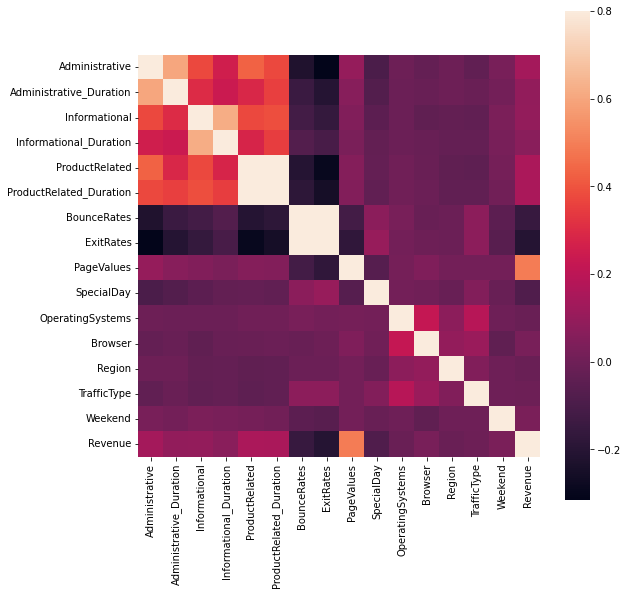

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
corrmat=train.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [ ]:
feature_customer=train.copy()
numerical_features=['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration']
for cols in numerical_features:
    Q1 = feature_customer[cols].quantile(0.25)
    Q3 = feature_customer[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (feature_customer[cols] >= Q1 - 1.5 * IQR) & (feature_customer[cols] <= Q3 + 1.5 *IQR)
    feature_customer=feature_customer.loc[filter]

In [ ]:
feature_customer.loc[feature_customer['SpecialDay'] > 0.4, 'SpecialDay'] = 1
feature_customer.loc[feature_customer['SpecialDay'] <= 0.4, 'SpecialDay'] = 0
feature_customer['SpecialDay'].value_counts()

0.0    8231
1.0     518
Name: SpecialDay, dtype: int64

In [ ]:
feature_customer['SpecialDay']=feature_customer['SpecialDay'].astype('bool')
feature_customer['SpecialDay'].value_counts()

False    8231
True      518
Name: SpecialDay, dtype: int64

In [ ]:
for cols in ['Administrative','Informational','ProductRelated','OperatingSystems','Browser',
             'Region','TrafficType','VisitorType']:
    feature_customer[cols] = feature_customer[cols].astype('category')

In [ ]:
Categorical_variables=['Weekend','Revenue','Administrative','Informational','ProductRelated','SpecialDay',
 'OperatingSystems','Browser','Region','Month','TrafficType','VisitorType']


feature_scale=[feature for feature in feature_customer.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(feature_customer[feature_scale])

StandardScaler()

In [ ]:
scaled_data = pd.concat([feature_customer[['Weekend','Revenue','Administrative','Informational',
                                    'ProductRelated','SpecialDay','OperatingSystems',
                                    'Browser','Region','Month','TrafficType','VisitorType']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(feature_customer[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,True,False,0.0,0.0,10.0,False,3,3,1,Feb,4,Returning_Visitor,-0.72985,-0.22876,-0.323731,1.427257,1.424088,-0.331166
1,False,False,0.0,0.0,19.0,False,2,2,1,Feb,3,Returning_Visitor,-0.72985,-0.22876,-0.917944,0.989636,-0.078226,-0.331166
2,False,False,0.0,0.0,3.0,False,2,4,1,Feb,2,Returning_Visitor,-0.72985,-0.22876,-0.184997,-0.651445,-0.216370,-0.331166
3,False,False,0.0,0.0,3.0,False,1,1,3,Feb,3,Returning_Visitor,-0.72985,-0.22876,-0.615638,-0.651445,2.408363,-0.331166
4,False,False,0.0,0.0,16.0,False,1,1,4,Feb,3,Returning_Visitor,-0.72985,-0.22876,-0.599630,1.297338,-0.003110,-0.331166


In [ ]:
encoded_features=['Month','VisitorType']

label_data = scaled_data.copy()
label_encoder = LabelEncoder()
for col in encoded_features:
    label_data[col] = label_encoder.fit_transform(scaled_data[col])
    
label_data.head()

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,True,False,0.0,0.0,10.0,False,3,3,1,2,4,2,-0.72985,-0.22876,-0.323731,1.427257,1.424088,-0.331166
1,False,False,0.0,0.0,19.0,False,2,2,1,2,3,2,-0.72985,-0.22876,-0.917944,0.989636,-0.078226,-0.331166
2,False,False,0.0,0.0,3.0,False,2,4,1,2,2,2,-0.72985,-0.22876,-0.184997,-0.651445,-0.216370,-0.331166
3,False,False,0.0,0.0,3.0,False,1,1,3,2,3,2,-0.72985,-0.22876,-0.615638,-0.651445,2.408363,-0.331166
4,False,False,0.0,0.0,16.0,False,1,1,4,2,3,2,-0.72985,-0.22876,-0.599630,1.297338,-0.003110,-0.331166


In [ ]:
X=label_data.drop(['SpecialDay','VisitorType','Weekend','Revenue','Informational','OperatingSystems',
                                    'Browser','Region','Administrative_Duration','Administrative','TrafficType','Informational_Duration'],axis=1)
y=label_data.Revenue

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (6999, 6)
Input Test: (1750, 6)
Output Training: (6999,)
Output Test: (1750,)


In [ ]:
X_train.head(5)

,ProductRelated,Month,ProductRelated_Duration,BounceRates,ExitRates,PageValues
3807,34.0,6,0.162570,0.571321,1.337240,-0.331166
3901,13.0,7,-0.220068,-0.651445,-1.074456,3.238185
2852,3.0,6,-1.092732,-0.651445,2.408363,-0.331166
3455,24.0,6,-0.418941,0.214681,-0.298393,-0.331166
4285,179.0,0,1.071106,-0.648607,0.006591,-0.331166


In [ ]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
pred=LR.predict(X_test)
print("Model Accuracy:- ",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Model Accuracy:-  0.8897142857142857
[[1436   41]
 [ 152  121]]
              precision    recall  f1-score   support

       False       0.90      0.97      0.94      1477
        True       0.75      0.44      0.56       273

    accuracy                           0.89      1750
   macro avg       0.83      0.71      0.75      1750
weighted avg       0.88      0.89      0.88      1750



Text(0.5, 384.16, 'Predicted label')

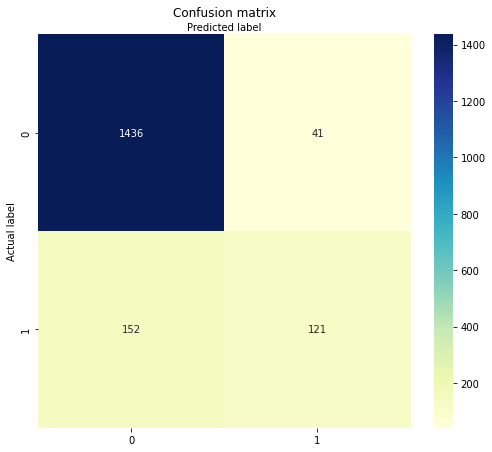

In [ ]:
y_pred = LR.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

# create heatmap
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(pred)

[False False False ... False False  True]


In [ ]:
import pickle
# now you can save it to a file
filename = 'shop ml model'
pickle.dump(LR,open(filename,'wb'))


In [ ]:
with open(filename, 'rb') as f:
    k = pickle.load(f)